In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#this function calculates the value of the function that we wish to find the root of here it is the y(2pi) we would get for a certain y'(0)
#def f(yprimeatzero):
    #t,y = rk2( [7.0, yprimeatzero], 0, 2.0*np.pi, 0.0001, example_function)
    #return y[:,0][-1]


In [142]:
#find difference between 2 numbers
def diff(low,high):
    return high-low

#find the average between 2 numbers (halfway point between them)
def average(low,high):
    return (low+high)/2

#recursive function that approximates the solution to a given function
#Inputs:
#   eq = function to find solution of
#   xlow = lower (negative) x-value guess
#   xhigh = higher (positive) x-value guess
#   precision = highest order of allowable error (eg. 0.1, 0.01, 0.001, etc.)
#   iterations (optional) = number of recursions the function has looped through = automatically set to 0

#Output:
#   [xfinal,iterations] = list of the final approximated solution and the number of recursions the function has gone through

def bisection(eq, xlow, xhigh, precision, iterations=0):
    #calculate the midpoint between the 2 x-value guesses
    xnew = average(xlow,xhigh)

    #base case:
    #if the difference between guesses is smaller than the allowable error, return the midpoint as an approximate solution
    if(diff(xlow,xhigh)<=precision):
        #round answer to same number of decimal points as allowable error (sig figs)
        xfinal = round(xnew, int(-1*np.log10(precision))) 
        return [xfinal,iterations]
    
    #if the midpoint = 0, return this value as the root
    elif(eq(xnew)==0):
        #round answer to same number of decimal points as allowable error (sig figs)
        xfinal = round(xnew, int(-1*np.log10(precision))) 
        return [xfinal,iterations]
    
    #if the midpoint is negative, re-call function with midpoint as lower x-value guess
    elif(eq(xnew)<0):
        #increase number of iterations as the function calls itself
        return bisection(eq,xnew,xhigh,precision,iterations+1)
    
    #if the midpoint is positive, re-call the function with midpoint as higher x-value guess
    else:
        #increase number of iterations as the function calls itself
        return bisection(eq,xlow,xnew,precision,iterations+1)


In [143]:
#copied directly from the textbook and lecture notes
def rk2(y0, t0, tf, dt, deriv_func):
    """
    Numerically integrate m first order ODEs using the Runga-Kutta 
      second-order method, where m is an integer greater than zero.

    Input
    ----------
    y0:         Array of m initial dependent-variable values
    t0, tf:     Initial and Final independent-variable values
    dt:         Step size for the independent variable
    deriv_func: Function to be numerically integrated

    Output
    ----------
    t:          Array of independent-variable values, one entry for each step
    y:          Array of corresponding dependent-variables values, 
                  first index is step number, 
                  second index is dependent-variable number
    """

    t = np.arange(t0, tf+dt, dt) # starts at t0 and makes steps of size dt
    n_steps = len(t)             # number of steps to get to tf
    m = len(y0)                  # number of dependent variables
    y = np.zeros((n_steps, m))   # create an array to put answers into
    y[0,:] = y0                  # initial condition

    for n in range(n_steps-1):
        # Take a half step
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        # Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = y[n,:] + dt*f_star
        
    return t, y

In [154]:
#split the 2nd order ODE into 2 first order ODEs:
# y" = -9y
def function(y,t): #y will be an array of y_0 and y_1
    f0=y[1] #1st diff eq
    f1=-9.0*y[0] #2nd diff eq
    return np.array([f0,f1]) #return them as an array

In [155]:
#calculate values using rk2, with y(0)=1 as a guess, y'(0)=0 as initial condition
t,y = rk2( [1.0, 0.0 ], 0, 2.0*np.pi, 0.0001, function) 

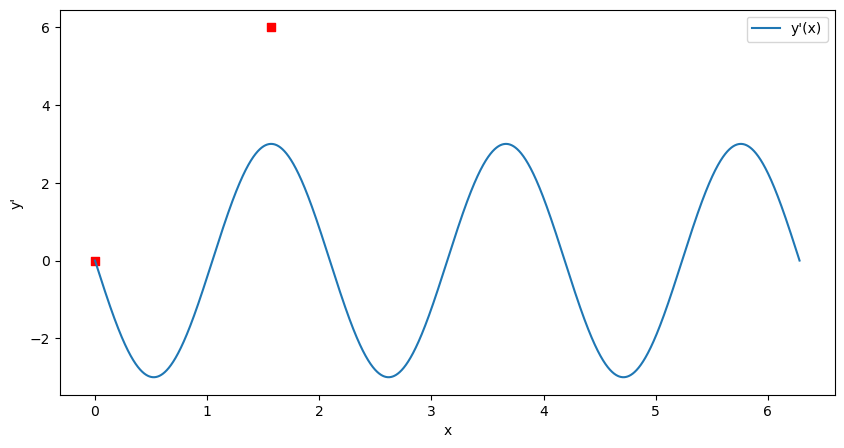

In [156]:
#plot currently calculated y' values
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(t,y[:,1], label="y'(x)")
plt.scatter([0,0.5*np.pi],[0,6.0],color='red',marker='s')
plt.xlabel("x")
plt.ylabel("y'")
plt.legend()
plt.show()

These values do not match our second initial condition of y'(pi/2)=6

Use Bisection Function (Shooting Method) to find correct y(0) initial condition to get the correct y'(pi/2) value

In [166]:
#this function calculates the value of the function that we wish to find the root of 
# here it is the y'(pi/2) we would get for a certain y(0) (want y'(pi/2)=6)
def f(yatzero):
    t,y = rk2( [yatzero, 0.0], 0, 2.0*np.pi, 0.0001, function)
    y_pi2 = y[int((np.pi/2)/(0.0001)), 1]
    #function to find root of is actually y'(pi/2) - 6 = 0
    val = y_pi2 - 6
    return val


In [167]:
#use bisection function to find which f(0) makes f(pi/2) = 6
yatzero, n = bisection(f, -100, 100, 0.0001)

In [168]:
#send in newly found f(0) initial condition to recalculate values
t1,y1 = rk2( [yatzero, 0.0 ], 0, 2.0*np.pi, 0.0001, function) 

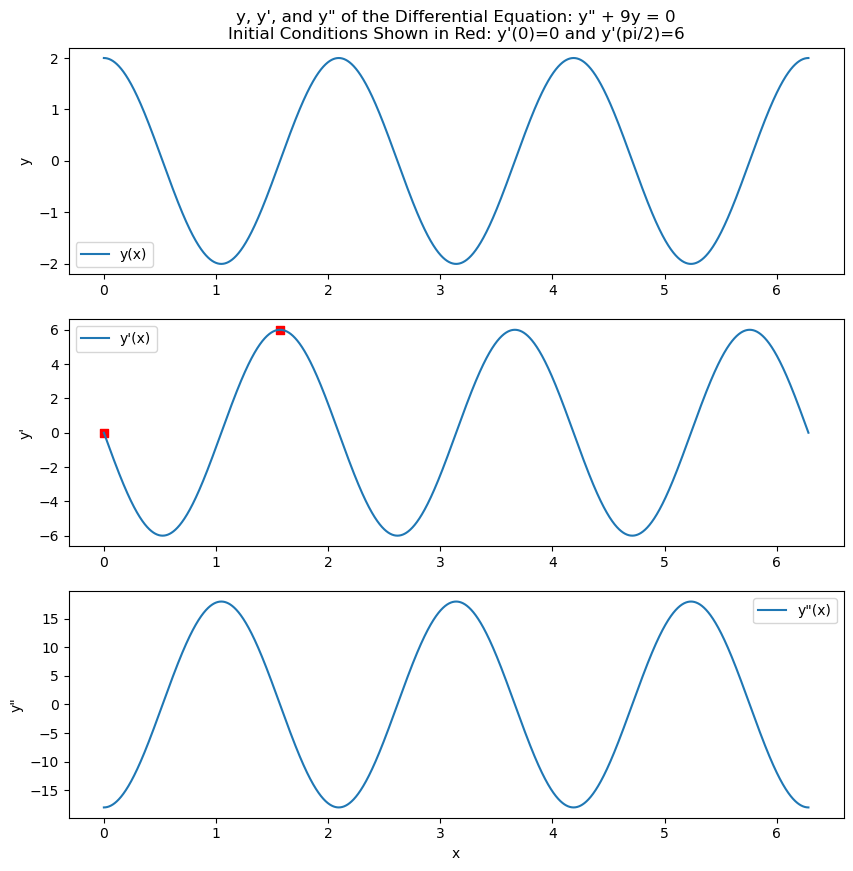

In [170]:
#plot the newly found y, y', and y" values
plt.figure(figsize=[10,10])

plt.subplot(311)
plt.plot(t1,y1[:,0], label="y(x)")
plt.ylabel("y")
plt.title("y, y', and" + ' y" of the Differential Equation: y" + 9y = 0' + "\nInitial Conditions Shown in Red: y'(0)=0 and y'(pi/2)=6")
plt.legend()

plt.subplot(312)
plt.plot(t1,y1[:,1], label="y'(x)")
plt.scatter([0,0.5*np.pi],[0,6.0],color='red',marker='s')
plt.ylabel("y'")
plt.legend()
           
plt.subplot(313)
#array of y"s = just -9*array of ys
y_dd = y1[:,0]*-9
plt.plot(t1,y_dd, label='y"(x)')
plt.ylabel('y"')
plt.xlabel("x")
plt.legend()

plt.show()